# Individual Project Planning #
## Project Overview:
**Broad question addressed:** We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

We want players to contribute a large amount of data -> more playtime

**Specific question:** Can age and/or experience predict playtime in PLAICraft servers?

## Data Description:
Full descriptive summary of the dataset:
1. Number of observations and summary statistics (2 decimal places) (Mean value for each quantitative variable in players.csv)
2. Variable: number, types and names, meaning, data collection methods
3. Exploratory visualizations (plots)
4. Data issues (observable and non-observable)



In [1]:
# load the data and the library:
library(tidyverse)
players <- read_csv("https://raw.githubusercontent.com/calentynes/indrepo/refs/heads/main/players.csv")
#we are only using players.csv

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 1. Number of observations and summary statistics:

In [2]:
summarystatistics_players <- summary(players)
summarystatistics_players #summary statistics

mean_players <- group_by(players) |>
      summarise(
        mean_hours = mean(played_hours, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE)) |>
    mutate(mean_hours = round(mean_hours, 2), 
           mean_age = round(mean_age, 2))

mean_players #mean value in a table format



  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

mean_hours,mean_age
<dbl>,<dbl>
5.85,21.14


If run players, we can see that the data is already tidy. There is one observation on each row, each column has one type of observation, and each cell has one observation. Therefore, we don't need to tidy the data.

In [3]:
head(players, n = 5) #showing first 5 rows to make my point

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


### 2. Variable: number, types and names, meaning, data collection methods

#### In players.csv:

- **Length: 196** — there are 196 observations
  
There are 7 categories:
1. **experience**
    - The level of Minecraft experience each player has in the 'character' data type. It has levels: Beginner, Amateur, Regular, Veteran, and Pro. This data was collected from a UBC qualtrics form question where the player can choose an experience level of Minecraft from 0 - 5, from "I've never played"  to "I'm a pro". A similar question proceeds this one, asking the level of familiarity with PLAICraft on a level from 0 - 5.
2. **subscribe**
   - Whether the player is subscribed to a game-related newsletter or not in the 'logical' data type (true or false). It shows that 52/196 players have FALSE and 144/196 players have TRUE
3. **hashedEmail**
   - The email of each player in a hashed format (likely for privacy purposes), in the 'character' data type. Each player must provide their email address to play on the server, which is how the data was collected.
4. **played_hours**
   - The number of hours each player has played in the 'numeric' data type. mean_hours displays the average number of hours played for all players, $\approx 5.85$
5. **name**
   - The first name of each player in the 'character' data type. This data was likely obtained from when players need to input contact information.
6. **gender**
   - The gender of each player in the 'character' data type. Player choices are: Male, Female, Agender, Two-Spirited, Non-binary, and Prefer not to say—although it is unclear if these were all the available choices, or that there were more options that were not picked. These stats were likely taken from previous survey questions, similar to **experience**.
7. **Age**
   - The age of each player in the 'numerical' data type'. mean_age displays that the average age of all players is $\approx 21.14$. These stats were likely taken from previous survey questions, similar to **experience**.

###  3. Exploratory visualizations (plots)

We want to see the relationship between the total of playtime and player age. To do this, we can make a scatterplot graph. But first, we should combine the two dataframes and clean up the data so we only have relevant columns. We get rid of NA values. We then get the mean number of hours for each Age group. Then, we can do the plot.

Age,mean_hours
<dbl>,<dbl>
9,30.3000000
10,3.6000000
11,2.9000000
12,0.5000000
14,8.7000000
15,0.1000000
16,50.0333333
17,4.8863014
18,0.2285714


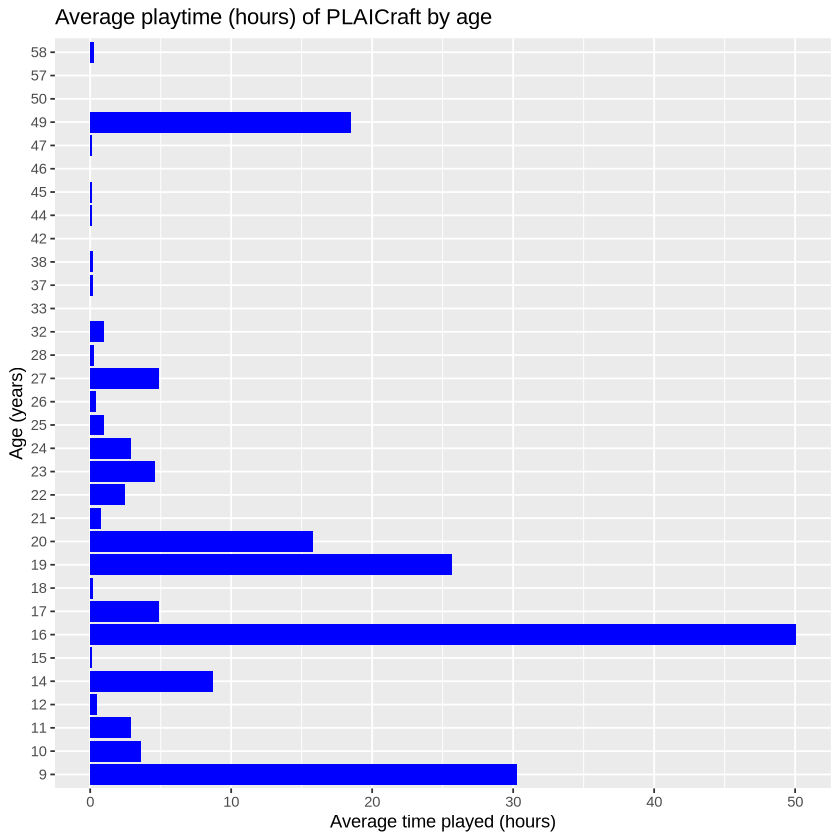

In [57]:
players_age <- players |>
    na.omit() |>
    select(Age, played_hours, name) |>
    arrange(Age) |>
    group_by(Age) |>
    summarize(mean_hours = mean(played_hours))
players_age
hours_vs_age <- players_age |> ggplot(aes(x = mean_hours, y = as_factor(Age))) +
    geom_bar(stat="identity", fill = "blue") + 
    labs(x = "Average time played (hours)", y = "Age (years)", title = "Average playtime (hours) of PLAICraft by age")

hours_vs_age

From this graph, we can see that age does have an impact on total time played. Ages 20 and 19 have the most average hours played. This answers our specific question, whether age can predict total time played. For the broad question, which "kinds" of players are most likely to contribute a large amount of data, we can say that younger players are most likely to play more of the game—contributing more data in the process. With this method, we can also see if other variables, like gender and experience, affect total time played using a bar graph.

Now we want to graph experience vs average hours played to see if experience has an impact on how much someone plays. First, we will convert each experience level to a number. I didn't want to assign 0 to Beginner, in case that caused computational issues. Then, I turned it to a numeric data type with as.numeric.

In [61]:

players_experience <- players |>
    mutate(experience = as.numeric(str_replace_all(experience, c("Pro"="5", "Veteran" = "4", "Regular"="3", "Amateur"="2", "Beginner"="1")))) |>
    select(experience, played_hours) |>
    arrange(-experience) |>
    group_by(experience) |>
    summarize(mean_hours = mean(played_hours))

players_experience



experience,mean_hours
<dbl>,<dbl>
1,1.2485714
2,6.0174603
3,18.2083333
4,0.6479167
5,2.6000000


Now I have a table that shows me the mean hours for each experience level. We can graph this to see what the relationship between experience and hours played is.

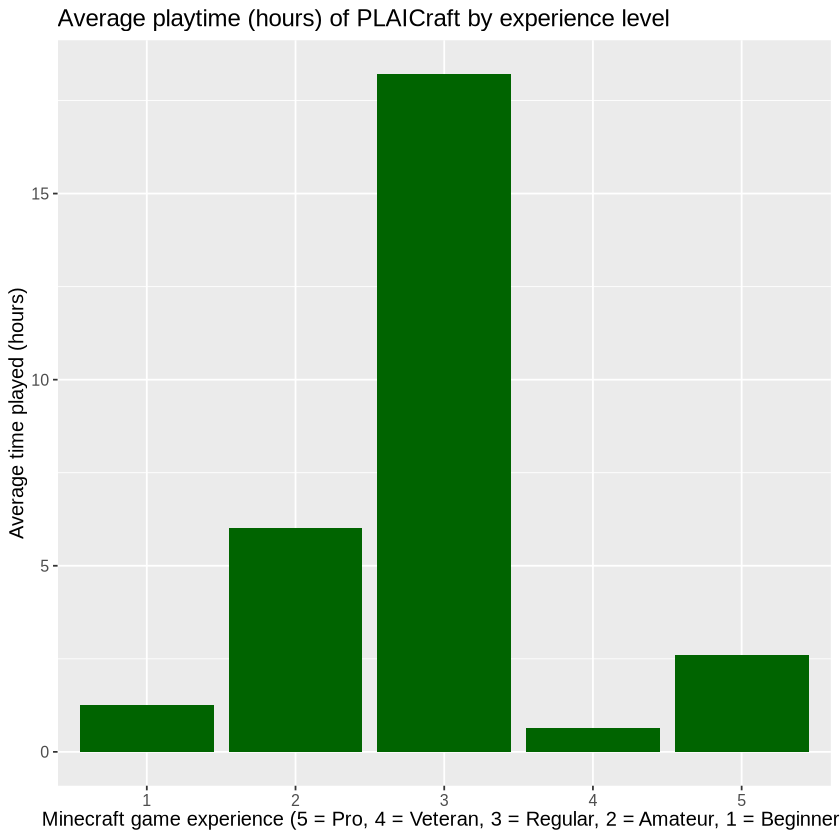

In [67]:

experience_vs_hours <- ggplot(players_experience, aes(x= as_factor(experience),y = mean_hours)) + 
    geom_bar(stat="identity", fill = "dark green") +
    labs(x = "Minecraft game experience (5 = Pro, 4 = Veteran, 3 = Regular, 2 = Amateur, 1 = Beginner)", y = "Average time played (hours)", 
         title = "Average playtime (hours) of PLAICraft by experience level") +
    theme(text = element_text(size = 12))

experience_vs_hours

From this, we can see that experience does have an impact on average hours played. However, this relationship is not linear, as hours played does not increase with game experience. The most average hours played is by the regular category.

## 4. Data issues

Potential issues in the data include a small sample size because many players only played for a couple minutes. This also means that the measurement of played_hours is not very accurate, since it doesn't account for smaller number units. A method to circumvent this is calculating the length of minutes played using sessions.csv and finding the average. However, this requires a lot of separation between one user's multiple sessions and age groups. In my previous versions, I did calculate the total minutes per session of playtime, but ran out of wordcount to do this.

## Methods and Plan:

1. We can use k-nn regression with age and/or experience as the predictor and play time as the variable we want to predict. We will use this method over linear regression since the relationship is not linear, as playtime does not increase as age or experience increases.
2. We should assume that there is a relationship between age/experience and playtime, since it relies on closer values being similar to one another. We should also assume that we want to just predict an outcome based off the age range in our data pool (9-58) or experience range from 0-5, since the model can't predict outside of that. 
3. k-nn  prediction is sensitive to noisy data, so it could capture inaccurate values if our data is too varied. We don't need to worry about the data set being too large here.
4. To compare and select the model, I will tune and use cross validation. Through this, I will select an optimal K value before I start the actual predcition. I will also measure prediction error using RMSPE.
5. I've already processed some of the data and got rid of NAs. After that, I will split the data 75:25 training-testing. Then I'll do cross-validation, pick the lowest RSMPE, figuring out the best K. Then I can do the actual prediction. I will try both predictors and the predictors one-by-one to assess the differences.

Note: I didn't count the titles and introduction/roadmap as wordcount.